In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve

from sklearn.inspection import permutation_importance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = 'data/telco-customer-churn.csv'

In [3]:
# wrangle data

def wrangle(data_path):
    # load data into DataFrame
    df = pd.read_csv(data_path)
    
    # Set target variable to integer values
    df.loc[df['Churn'] == 'No', 'churn'] = 0
    df.loc[df['Churn'] == 'Yes', 'churn'] = 1
    
    # drop old target variable
    df.drop(columns=["Churn"], inplace=True)
    
    # set index of DataFrame to `customerID`
    df.index = df['customerID']
    
    # drop columns
    df.drop(columns='customerID', inplace=True)
    
    # Change TotalCharges column into float value
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    
    # drop na
    df = df.dropna()
    
    return df

In [4]:
df = wrangle(path)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# What percentage of users have churned?

In [6]:
churn = len(df[df['churn'] == 1])
percent_churn = round(churn / len(df) * 100, 2)
percent_churn

26.58

# Split Data

In [7]:
# Split Data
X = df.drop(columns='churn')
y = df['churn']

In [8]:
X.shape, y.shape

((7032, 19), (7032,))

In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# OLS

In [12]:
import statsmodels.api as sm

In [13]:
# X_cols = [col for col in df.drop(columns='churn').columns]

In [14]:
ohe = OneHotEncoder(use_cat_names=True)

In [15]:
ohe.fit(X_train)

/Users/andrewlee/.local/share/virtualenvs/customer_churn_analysis-NqwBmIoP/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


OneHotEncoder(cols=['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod'],
              use_cat_names=True)

In [16]:
XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

In [17]:
X_columns = XT_train.columns.tolist()

In [18]:
def update_ols():
    X_ols = XT_train[X_columns]
    model = sm.OLS(y_train, X_ols).fit()
    print(model.summary())

update_ols()

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     96.00
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:35:48   Log-Likelihood:                -2433.0
No. Observations:                5625   AIC:                             4914.
Df Residuals:                    5601   BIC:                             5073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [19]:
# First iteration, drop statistically insignificant columns (p_val > 0.05)
remove_list = ['gender_Male', 'gender_Female', 'Partner_Yes', 'Partner_No', 'Dependents_Yes', 'Dependents_No',
              'PhoneService_Yes', 'PhoneService_No', 'MultipleLines_No', 'MultipleLines_Yes', 
               'MultipleLines_No phone service', 'InternetService_DSL', 'InternetService_No', 'InternetService_Fiber optic',
               'StreamingTV_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No internet service',
               'StreamingMovies_No', 'StreamingMovies_Yes', 'MonthlyCharges']

for feature in remove_list:
    X_columns.remove(feature)
    
update_ols()

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:35:48   Log-Likelihood:                -2536.7
No. Observations:                5625   AIC:                             5103.
Df Residuals:                    5610   BIC:                             5203.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Dropping features that aren't statistically significant doesn't improve the fit of the OLS model. Instead of dimensionality reduction, I'm going to try fitting a Logistic Regression/Random Forest Classifier and use sklearn's Permutation Feature Importance to find the most influencing features on the accuracy of the model. 

# Logistic Regression

In [20]:
# Create sklearn pipeline to automate encoding, scaling, and training

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/customer_churn_analysis-NqwBmIoP/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
# Churn probability
np.set_printoptions(suppress=True)
model_lr.predict_proba(X_test)

array([[0.58688419, 0.41311581],
       [0.98771252, 0.01228748],
       [0.67697499, 0.32302501],
       ...,
       [0.42371093, 0.57628907],
       [0.96979866, 0.03020134],
       [0.97285254, 0.02714746]])

In [22]:
# Churn Predictions
model_lr.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [23]:
# Accuracy Score
model_lr.score(X_test, y_test)

0.7903340440653873

# Confusion Matrix, ROC Curve

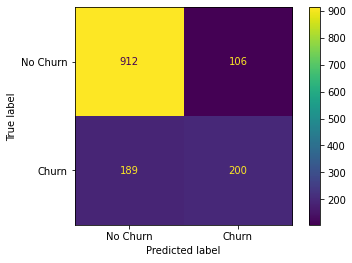

In [24]:
plot_confusion_matrix(model_lr, X_test, y_test, values_format='.0f',
                      display_labels=['No Churn', 'Churn'])

In [25]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1018
         1.0       0.65      0.51      0.58       389

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



## ROC Curve

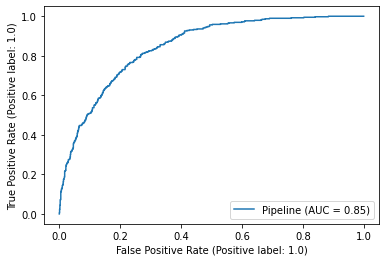

In [26]:
lr = plot_roc_curve(model_lr, X_test, y_test)

In [27]:
# Classify each user as churned or not churned
classify_df = X_test.copy()
np.set_printoptions(suppress=True)
classify_df["Churn_Probability"] = model_lr.predict_proba(X_test)[:,1]
classify_df['Churn'] = model_lr.predict(X_test)

In [28]:
classify_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Probability,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
4811-JBUVU,Male,0,No,No,30,Yes,Yes,Fiber optic,No,No,...,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),89.90,2723.15,0.413116,0.0
8577-QSOCG,Female,0,Yes,Yes,38,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.20,746.05,0.012287,0.0
7963-GQRMY,Female,0,Yes,Yes,3,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,44.30,134.50,0.323025,0.0
0533-BNWKF,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,85.45,4874.70,0.323747,0.0
0489-WMEMG,Female,0,No,Yes,23,Yes,No,DSL,No,No,...,Yes,No,No,One year,Yes,Electronic check,49.45,1119.35,0.115125,0.0


In [29]:
# Permutation Feature Importance

perm_imp = permutation_importance(
    model_lr, 
      X_test, 
      y_test, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

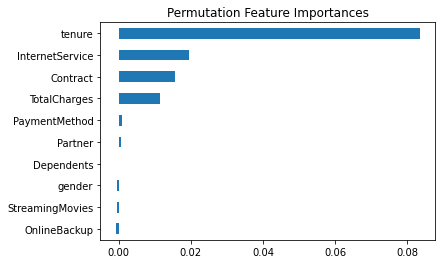

In [30]:
data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

perm_df = pd.DataFrame(data, index=X_test.columns).sort_values('imp_mean')
perm_df['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

In [31]:
perm_df

,imp_mean,imp_std
TechSupport,-0.003269,0.001658
MultipleLines,-0.002843,0.004021
StreamingTV,-0.002274,0.001980
PaperlessBilling,-0.001848,0.002040
OnlineSecurity,-0.001706,0.002040
SeniorCitizen,-0.001564,0.001875
MonthlyCharges,-0.001564,0.001928
PhoneService,-0.001279,0.001645
DeviceProtection,-0.001137,0.002318
OnlineBackup,-0.000853,0.001820


# Simplify LogReg Model

In [32]:
# Model 2: Simplified Model (Fewer features)
df2 = df[['tenure', 'InternetService', 'churn']]
df2.head()

,tenure,InternetService,churn
customerID,,,
7590-VHVEG,1,DSL,0.0
5575-GNVDE,34,DSL,0.0
3668-QPYBK,2,DSL,1.0
7795-CFOCW,45,DSL,0.0
9237-HQITU,2,Fiber optic,1.0


In [33]:
# Split Data
X2 = df2.drop(columns='churn')
y2 = df2['churn']

In [34]:
# Train Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [35]:
# Create model pipeline
model_lr2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr2.fit(X_train2, y_train2)

/Users/andrewlee/.local/share/virtualenvs/customer_churn_analysis-NqwBmIoP/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['InternetService'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
# Model score
model_lr2.score(X_test2, y_test2)

0.7931769722814499

In [37]:
# Permutation Feature Importances for new model
perm_imp2 = permutation_importance(
    model_lr2, 
      X_test2, 
      y_test2, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

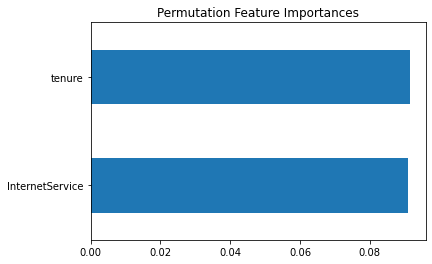

In [38]:
data = {'imp_mean': perm_imp2['importances_mean'],
        'imp_std': perm_imp2['importances_std']}

perm_df2 = pd.DataFrame(data, index=X_test2.columns).sort_values('imp_mean')
perm_df2['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

# Analysis:
Model Performance ~79% accuracy. Precision and Recall are low for predicting churn, ~65% and ~60%, respectively. The most important features in predicting user churn are `tenure` and `InternetService` (Found using Permutation Feature Importances technique). Dropping columns that don't contribute to the model (features that contribute less than 1% increase to model performance) improved the accuracy of the model by simplifying it. If I wanted to improve the accuracy score further, I would tune the hyperparameters of Logistic Regression/Random Forest using Randomized Search to find important hyperparameters, then follow it up with brute force Grid Search on specific parameters to optimize further.

For the purpose of this analysis, incremental accuracy improvements is not the goal. Understanding the patterns in the data and finding the most important features in correctly predicting churned users is the goal. That way these features can be focused on when diving deeper into the analysis, visualizing, and communicating these insights using Tableau.

Next Step is to import this dataset into Tableau and focus on the top features (`tenure` and `InternetService`) that contribute to the accuracy of the model to try to find and visualize the relationships between these features and `Churn`. This will help us understand which users will likely churn in the future and how to create initiatives around decreasing churn and increasing the LTV of users.


# Random Forest

In [39]:
model_rf = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

model_rf.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/customer_churn_analysis-NqwBmIoP/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod'])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [40]:
model_rf.predict_proba(X_test)

array([[0.61, 0.39],
       [0.99, 0.01],
       [0.62, 0.38],
       ...,
       [0.26, 0.74],
       [0.94, 0.06],
       [0.98, 0.02]])

In [41]:
model_rf.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [42]:
model_rf.score(X_test, y_test)

0.7796730632551528

In [43]:
# 2nd Random Forest Model
model_rf2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-2)
)

model_rf2.fit(X_train2, y_train2)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-2, random_state=42))])

In [44]:
model_rf2.score(X_test2, y_test2)

0.7896233120113717

# Random EDA Practice

In [45]:
df_gender = df.groupby(['gender']).mean()
df_gender

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn
gender,,,,,
Female,0.163078,32.290841,65.216652,2283.190985,0.269595
Male,0.161736,32.550296,64.387546,2283.407861,0.262046


### isin()

In [46]:
internet = ['Fiber optic', 'DSL']
df.loc[df['InternetService'].isin(internet)].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# Churn if tenure < 10 and 
# Contract = Month-to-month, One year and 
# Churn=1

In [47]:
contract = ['Month-to-month', 'One year']
new_df = df[(df['tenure'] <= 10) & (df['Contract'].isin(contract)) & (df['churn'] == 1)]
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1.0
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1.0
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1.0


# Neural Network

In [48]:
X_train.shape, y_train.shape

((5625, 19), (5625,))

In [49]:
X_train.shape[1]

19

In [50]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
8780-IXSTS,Female,0,No,No,6,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.1,521.30
1763-WQFUK,Male,0,No,No,3,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.5,147.75
3384-CTMSF,Male,0,Yes,No,47,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.1,5135.15
7560-QJAVJ,Female,0,No,No,70,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),79.6,5589.45
5908-QMGOE,Male,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.2,1133.90


In [51]:
ohe = OneHotEncoder(use_cat_names=True)

ohe.fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/Users/andrewlee/.local/share/virtualenvs/customer_churn_analysis-NqwBmIoP/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [52]:
XT_train.head()

,gender_Female,gender_Male,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure,PhoneService_Yes,PhoneService_No,...,Contract_Two year,Contract_One year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
8780-IXSTS,1,0,0,1,0,1,0,6,1,0,...,0,0,1,0,1,0,0,0,90.1,521.30
1763-WQFUK,0,1,0,1,0,1,0,3,1,0,...,0,0,1,0,0,1,0,0,50.5,147.75
3384-CTMSF,0,1,0,0,1,1,0,47,1,0,...,0,0,1,0,1,0,0,0,104.1,5135.15
7560-QJAVJ,1,0,0,1,0,1,0,70,1,0,...,1,0,0,1,0,0,1,0,79.6,5589.45
5908-QMGOE,0,1,1,1,0,1,0,15,1,0,...,0,0,1,0,0,0,0,1,74.2,1133.90


In [53]:
# Create NN Model

model = Sequential()

model.add(Dense(250, input_dim=XT_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(XT_train, y_train, validation_data=(XT_test, y_test), epochs=5)

2021-08-31 16:35:56.008809: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-31 16:35:56.108967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
176/176 [==============================] - 1s 3ms/step - loss: 6.3498 - accuracy: 0.7172 - val_loss: 2.0059 - val_accuracy: 0.7683
Epoch 2/5
176/176 [==============================] - 0s 1ms/step - loss: 1.2263 - accuracy: 0.7543 - val_loss: 0.8505 - val_accuracy: 0.7918
Epoch 3/5
176/176 [==============================] - 0s 1ms/step - loss: 1.7245 - accuracy: 0.7433 - val_loss: 1.9877 - val_accuracy: 0.7854
Epoch 4/5
176/176 [==============================] - 0s 1ms/step - loss: 1.5309 - accuracy: 0.7511 - val_loss: 2.6084 - val_accuracy: 0.7740
Epoch 5/5
176/176 [==============================] - 0s 991us/step - loss: 1.9476 - accuracy: 0.7429 - val_loss: 1.1046 - val_accuracy: 0.7839


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               11500     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 11,751
Trainable params: 11,751
Non-trainable params: 0
_________________________________________________________________


In [55]:
_, train_acc = model.evaluate(XT_train, y_train)
_, test_acc = model.evaluate(XT_test, y_test)

44/44 [==============================] - 0s 635us/step - loss: 1.1046 - accuracy: 0.7839


In [56]:
model.predict(XT_test)

array([[0.00422117],
       [0.00024873],
       [0.11335969],
       ...,
       [0.38120812],
       [0.        ],
       [0.00144479]], dtype=float32)